# Content

##Attributes

###People

*   **ID**: Customer's unique identifier
*   **Education**: Customer's education level
*   **Age**: Customer´s age
*   **Marital_Status**: Customer's marital status
*   **Income**: Customer's yearly household income
*   **#_children_at_home**: Number of children plus teenagers in customer's household
*   **Recency**: Number of days since customer's last purchase
*   **Complain**: 1 if customer complained in the last 2 years, 0 otherwise

###Products

*   **MntWines**: Amount spent on wine in last 2 years
*   **MntFruits**: Amount spent on fruits in last 2 years
*   **MntMeatProducts**: Amount spent on meat in last 2 years
*   **MntFishProducts**: Amount spent on fish in last 2 years
*   **MntSweetProducts**: Amount spent on sweets in last 2 years


###Promotion

*   **NumDealsPurchases**: Number of purchases made with discount
*   **Promotion_#_campaign_accepted:** Number of campaign that the customer accepted the promotion  

###Place

*   **NumWebPurchases**: Number of purchases made through the company’s web site
*   **NumCatalogPurchases**: Number of purchases made using a catalogue
*   **NumStorePurchases**: Number of purchases made directly in stores
*   **NumWebVisitsMonth**: Number of visits to company’s web site in the 
*   **lifetime_so_far_days:**  Number of days that have passed since the person started to be a ccustomer

In [ ]:
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/1.-Generating_a_proper_dataset.ipynb'
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/resources/Functions.ipynb'
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/resources/Load_libraries.ipynb'

In [12]:
# Darnos una idea de las dimensiones de nuestro data frame.
print(mk.shape, mk.size)

# tiene 2240 filas y 27 columnas

(2240, 21) 47040


In [13]:
mk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1 to 2240
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   ID                             2240 non-null   string  
 1   Education                      2240 non-null   category
 2   Marital_Status                 2240 non-null   category
 3   Income                         2240 non-null   float64 
 4   Recency                        2240 non-null   int32   
 5   MntWines                       2240 non-null   float64 
 6   MntFruits                      2240 non-null   float64 
 7   MntMeatProducts                2240 non-null   float64 
 8   MntFishProducts                2240 non-null   float64 
 9   MntSweetProducts               2240 non-null   float64 
 10  MntGoldProds                   2240 non-null   float64 
 11  NumDealsPurchases              2240 non-null   int32   
 12  NumWebPurchases                224

In [14]:
# echamos un vistazo a los descriptivos del dataset
mk.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,lifetime_so_far_days,#_children_at_home
count,"2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0","2,240.0"
mean,"51,977.8",49.1,303.9,26.3,166.9,37.5,27.1,44.0,2.3,4.1,2.7,5.8,5.3,48.1,"1,614.0",1.0
std,"21,409.5",29.0,336.6,39.8,225.7,54.6,41.3,52.2,1.9,2.8,2.9,3.3,2.4,11.7,232.2,0.8
min,"1,730.0",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,"1,102.0",0.0
25%,"35,538.8",24.0,23.8,1.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,40.0,"1,442.8",0.0
50%,"51,498.5",49.0,173.5,8.0,67.0,12.0,8.0,24.0,2.0,4.0,2.0,5.0,6.0,47.0,"1,615.0",1.0
75%,"68,275.8",74.0,504.2,33.0,232.0,50.0,33.0,56.0,3.0,6.0,4.0,8.0,7.0,58.0,"1,787.2",1.0
max,"162,397.0",99.0,"1,493.0",199.0,"1,725.0",259.0,263.0,362.0,15.0,27.0,28.0,13.0,20.0,77.0,"2,165.0",3.0


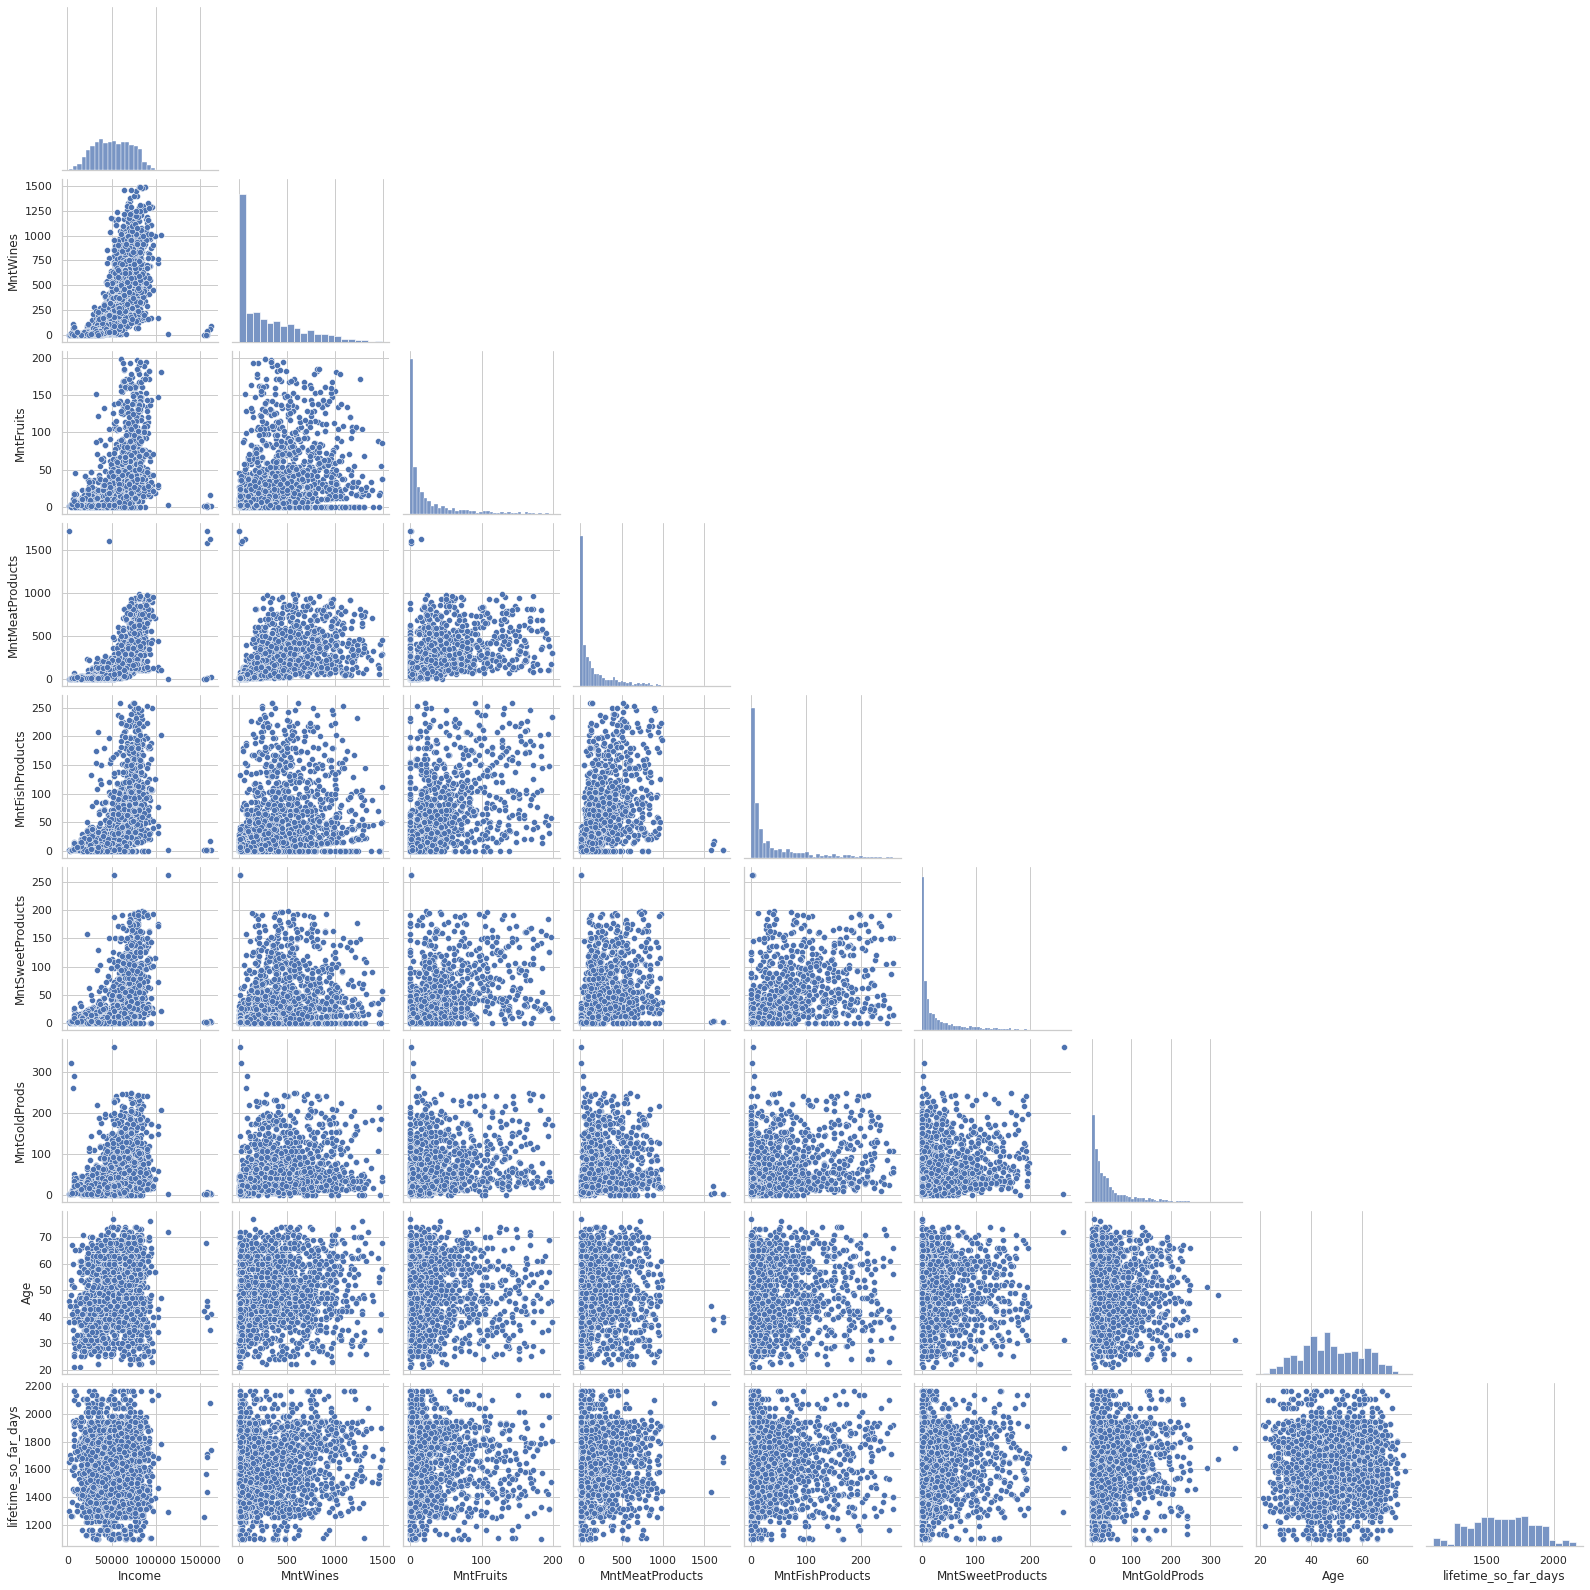

In [15]:
# Ahora echamos un vistazo rápido a las correlaciones presentes con el siguiente gráfico de Seaborn:

# Definition of the style grid
sns.set(style='whitegrid', context='notebook',rc = {'figure.figsize':(10,10)})
# We plot only the columns that have ['int64','float64'] type
cols = list(mk.select_dtypes(include=['int64','float64']))

# creamos un pairplot para ver las relaciones. "height" nos indicará que tan grande
# queremos que sean los recuadros
sns.pairplot(mk[cols], height=2.5, corner=True)
plt.show()

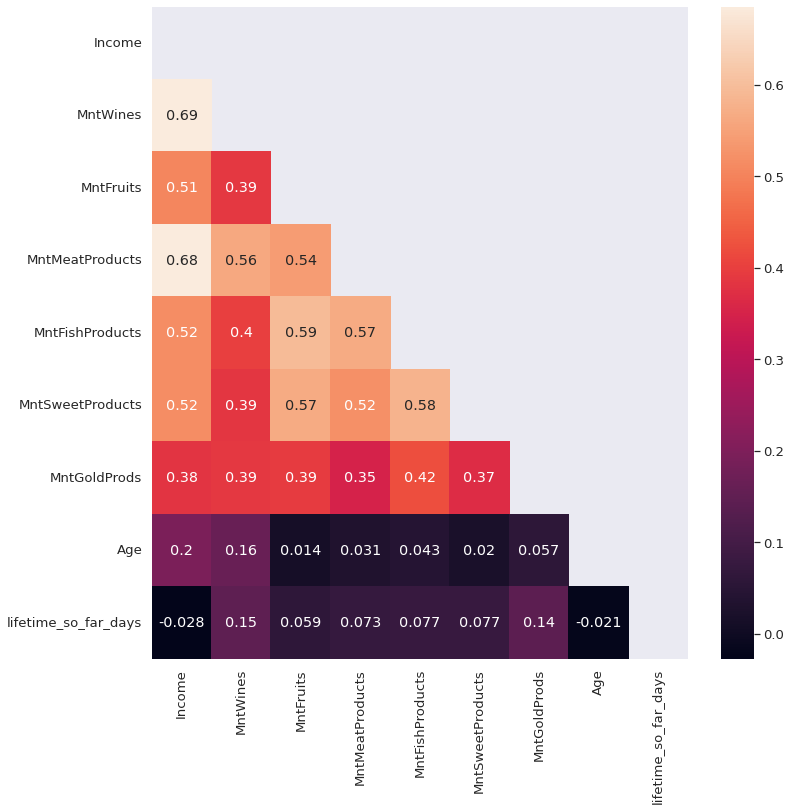

In [16]:
cm = np.corrcoef(mk[cols].values.T)
matrix = np.triu(cm)

sns.set(font_scale=1.2 ,rc = {'figure.figsize':(12,12)})

sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols, mask=matrix)

# note: consider that Total_spent_last_2_years corralates with the elements that were used to get the value of that variable

In [17]:
a = list(mk.select_dtypes(include=['int64','float64']))
b = list(mk.select_dtypes(include=['string','category']))

In [18]:
a

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'Age',
 'lifetime_so_far_days']

In [19]:
b

['ID',
 'Education',
 'Marital_Status',
 'Complain',
 'Promotion_#_campaign_accepted']

In [31]:
# # a = campaign_num.groupby('Promotion_#_campaign_accepted')['Total_$_spend_last_2_years'].sum()
# a = campaign_num.groupby(['Promotion_#_campaign_accepted', pd.cut(campaign_num['Total_$_spend_last_2_years'], [0, 500, 1000, 1500])])
# a.size().unstack()

In [41]:
mk['NumDealsPurchases'].max()

15

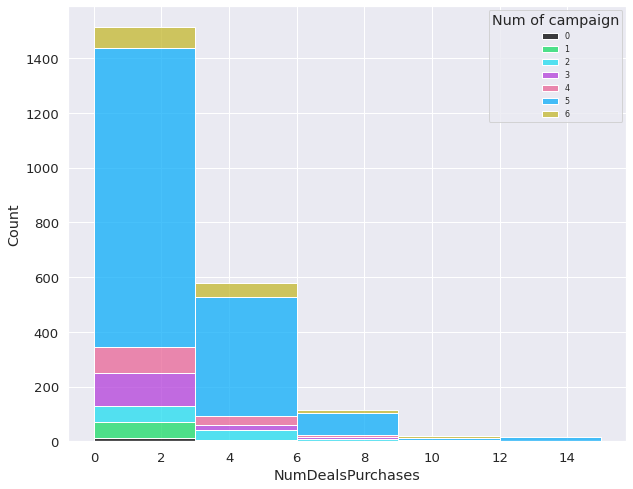

In [44]:
mk = mk.astype({'Promotion_#_campaign_accepted':'string'})
a =list(mk['Promotion_#_campaign_accepted'].unique())
a.sort()

fig, axe = plt.subplots(1,1, figsize=(10,8))
# axe = axe.ravel()
# ax = axe[0]

palette= ['#C4B82D','#0BADF9','#E96596','#B43FDA','#1FDDF0','#19DC66', 'black']

g1 = sns.histplot(mk, x = 'NumDealsPurchases', hue = 'Promotion_#_campaign_accepted',
            multiple='stack', palette=sns.color_palette(palette, len(palette)), bins= 5)
g1.legend(labels = b, bbox_to_anchor = (1, 1), fontsize = 8,
          title="Num of campaign")

plt.show()

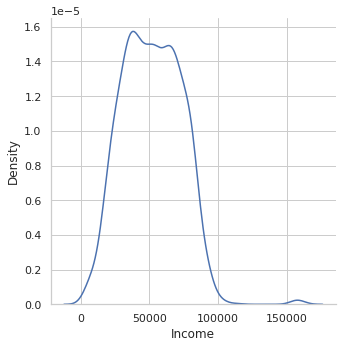

In [ ]:
sns.displot(mk, x="airborne", kind="kde")